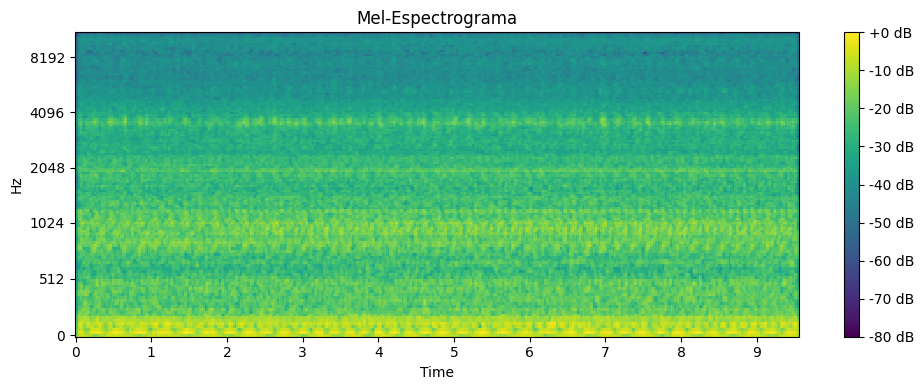

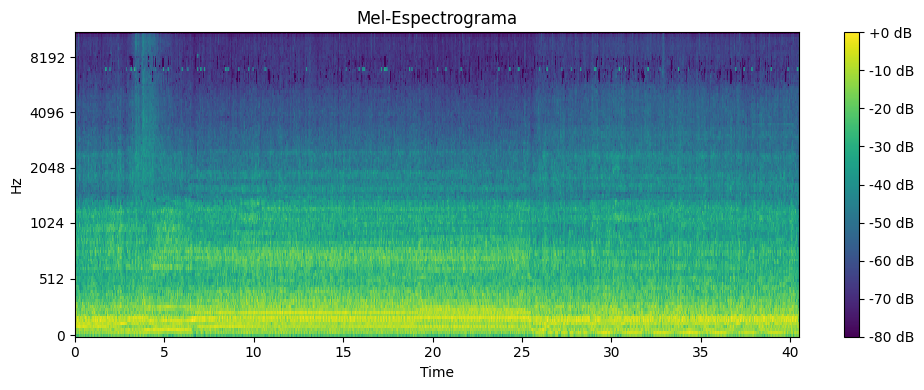

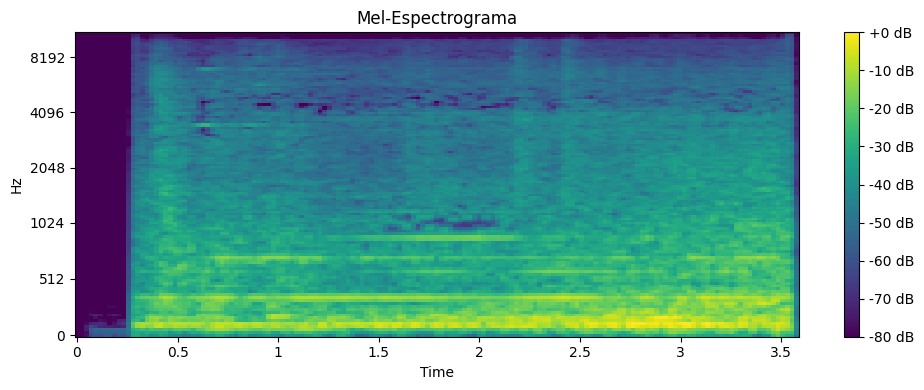

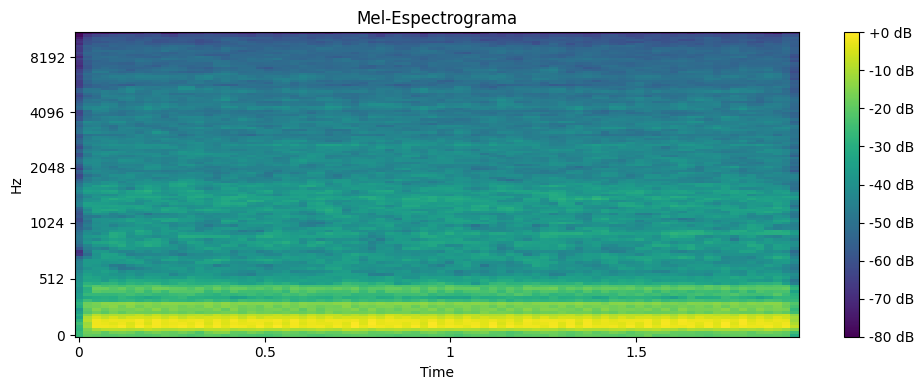

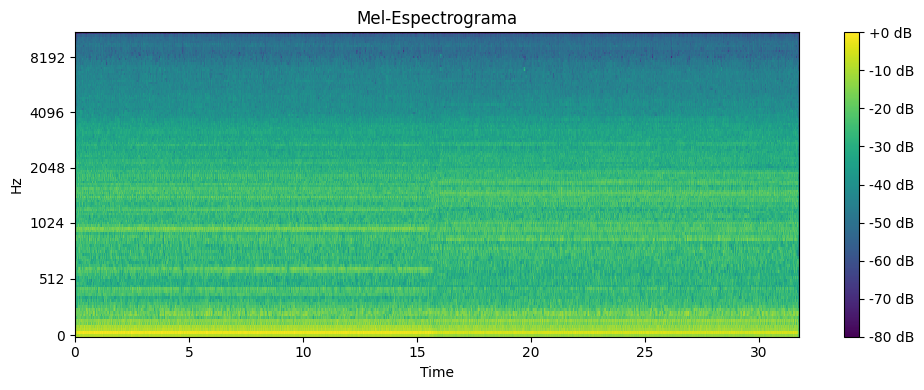

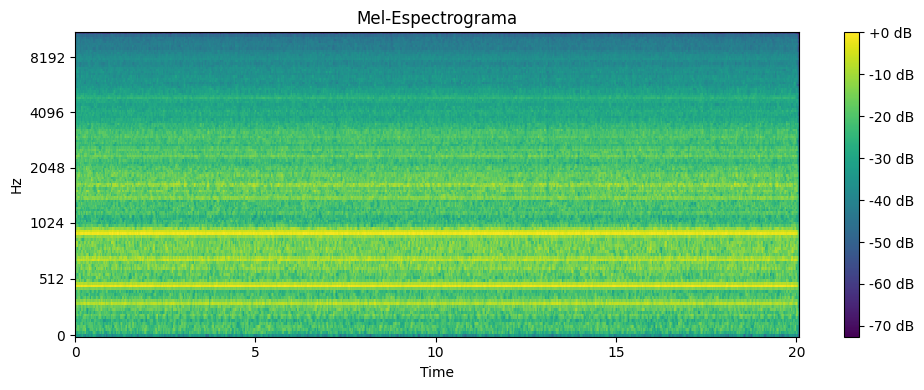

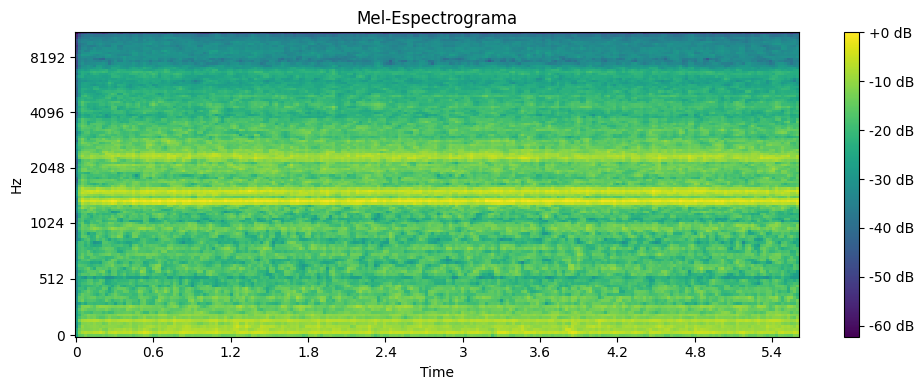

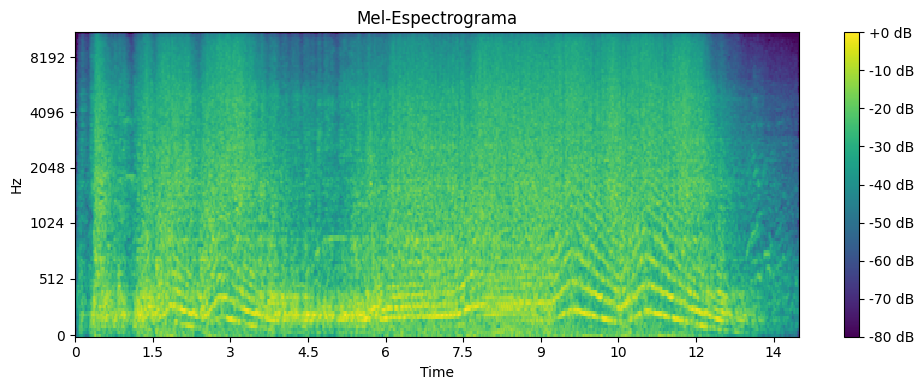

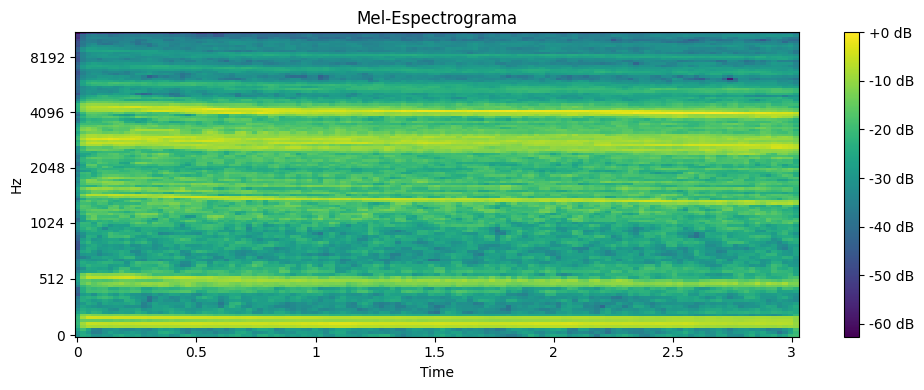

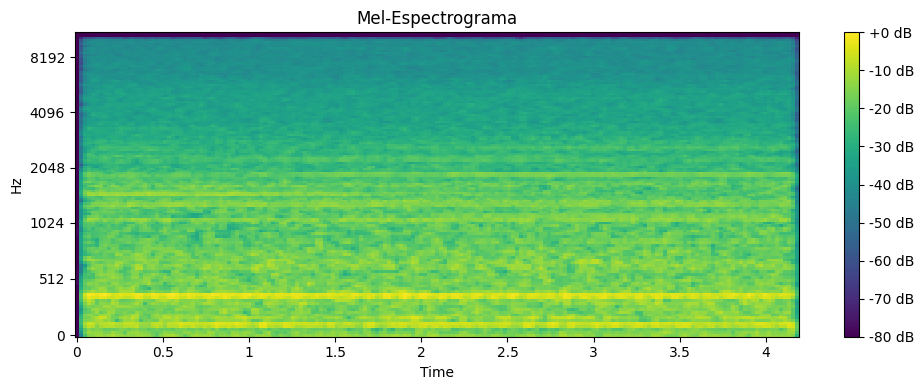

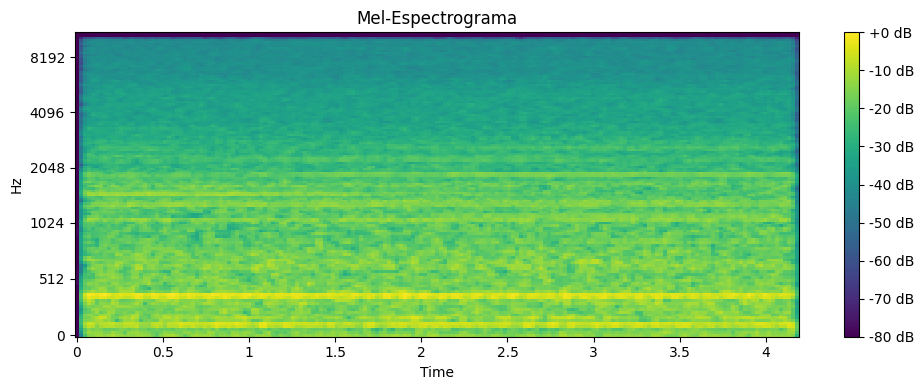

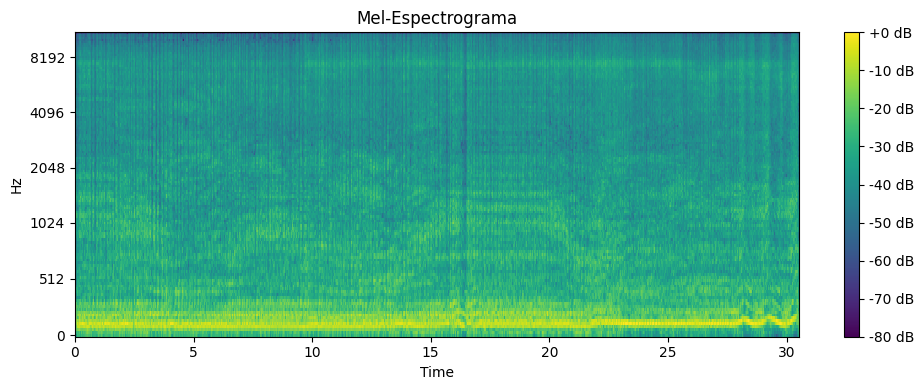

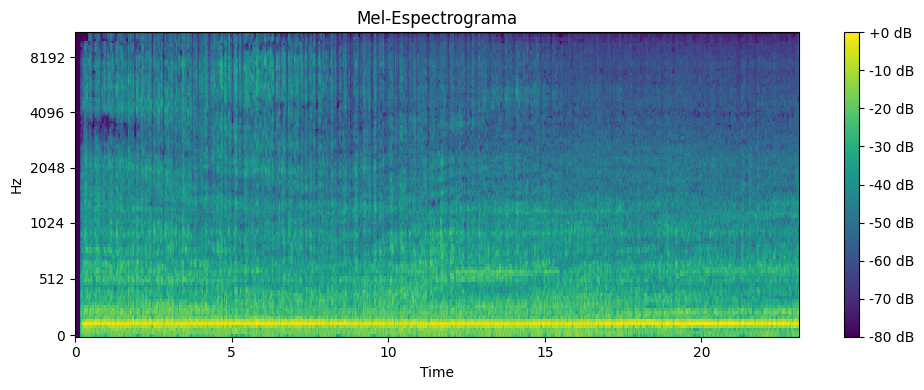

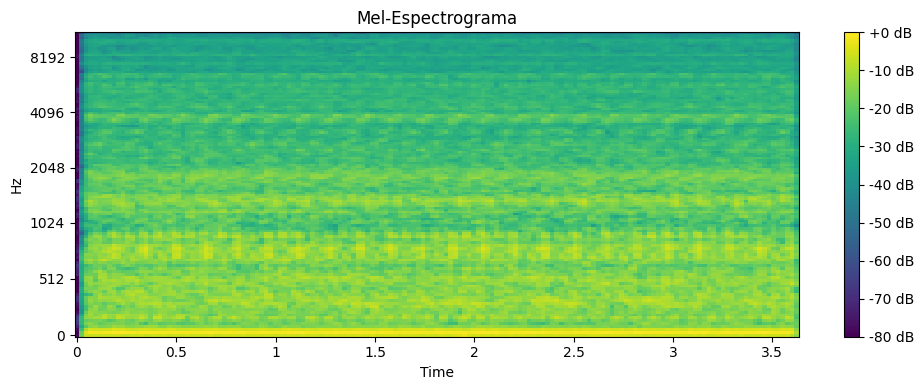

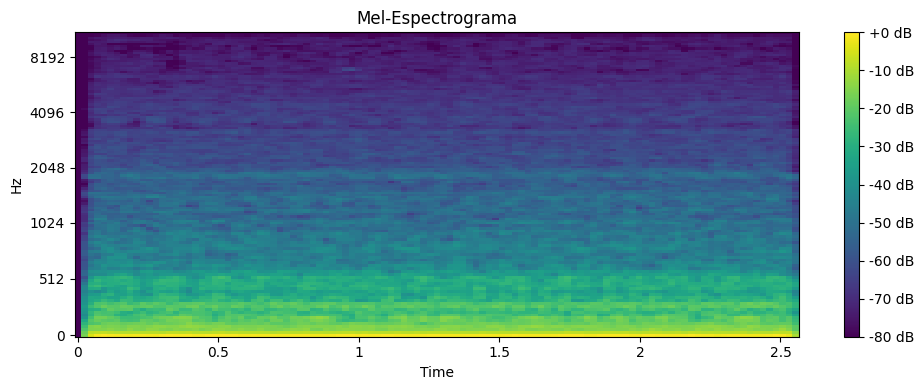

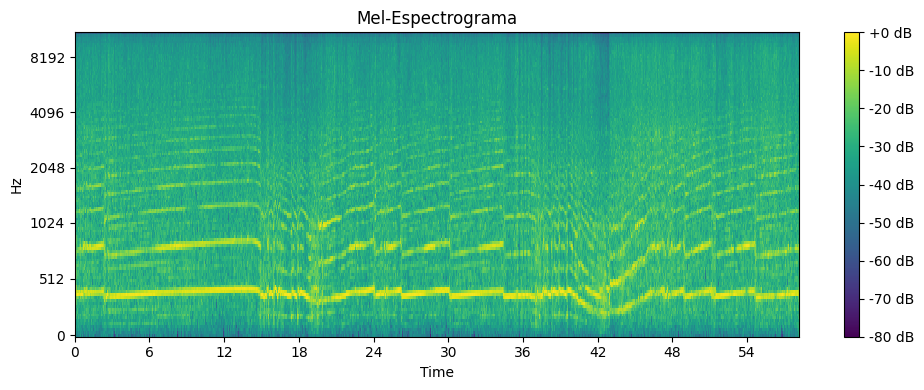

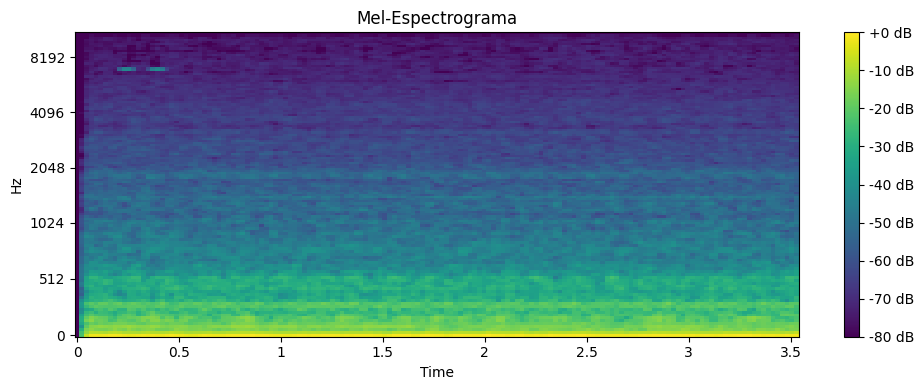

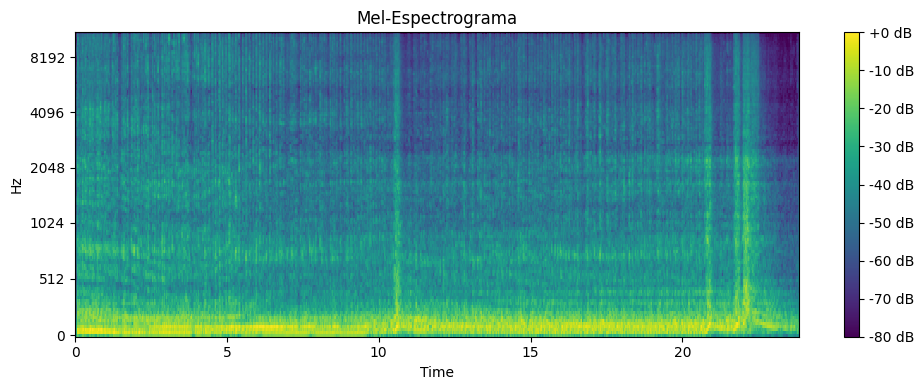

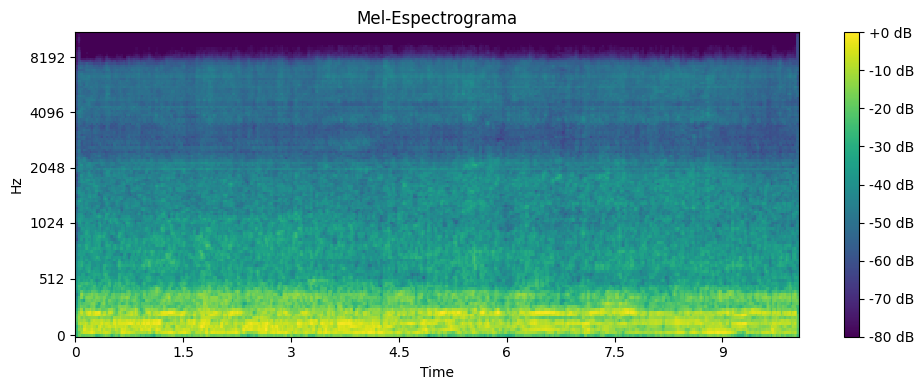

In [23]:
# Instalamos las bibliotecas necesarias
!pip install librosa matplotlib numpy --quiet

# Importamos las bibliotecas
import librosa # Biblioteca para análisis de audio
import librosa.display # Módulo para visualización de audio
import matplotlib.pyplot as plt # Biblioteca para visualización de datos
import numpy as np # Biblioteca para cálculos numéricos
import os # Biblioteca para manipulación de archivos

# Creamos las carpetas necesarias
input_folder = "../data/sounds/"  # Carpeta donde están los archivos .mp3
output_folder_with_legend = "../data/spectograms_legend/"  # Carpeta para guardar los espectrogramas con leyenda
output_folder_clean = "../data/spectograms_clean/"  # Carpeta para guardar los espectrogramas sin leyenda
os.makedirs(input_folder, exist_ok=True)  # Crear carpeta de entrada si no existe
os.makedirs(output_folder_with_legend, exist_ok=True)  # Crear carpeta de salida (con leyenda) si no existe
os.makedirs(output_folder_clean, exist_ok=True)  # Crear carpeta de salida (sin leyenda) si no existe

# Verificar si la carpeta de entrada tiene archivos .mp3
if not os.listdir(input_folder):
    print(f"La carpeta de entrada ({input_folder}) está vacía. Por favor, agrega archivos .mp3 y vuelve a intentarlo.")

# Definir la función para generar y guardar espectrogramas
def generate_and_save_spectrograms(audio_path, output_path_with_legend, output_path_clean):
    y, sr = librosa.load(audio_path) # Cargar el archivo de audio
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr) # Calcular el espectrograma mel
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max) # Convertir a decibeles
    
    # Guardar el espectrograma con leyenda
    plt.figure(figsize=(10, 4)) # Tamaño de la figura
    librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel', cmap='viridis') # Mostrar el espectrograma con mapa de colores viridis
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-Espectrograma')
    plt.tight_layout()
    plt.savefig(output_path_with_legend)  # Guardar como archivo con leyenda
    plt.show()  # Mostrar con leyenda en el notebook
    plt.close()
    
    # Guardar el espectrograma sin leyenda
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spec_db, sr=sr, x_axis=None, y_axis=None, cmap='viridis') # Mostrar el espectrograma con mapa de colores viridis
    plt.axis('off')  # Desactivar los ejes
    plt.tight_layout() 
    plt.savefig(output_path_clean, bbox_inches='tight', pad_inches=0)  # Guardar como archivo limpio
    plt.close()

# Procesar y generar espectrogramas
for audio_file in os.listdir(input_folder):
    if audio_file.endswith(".mp3"):
        input_path = os.path.join(input_folder, audio_file)
        output_path_with_legend = os.path.join(output_folder_with_legend, f"{os.path.splitext(audio_file)[0]}_con_leyenda.png")
        output_path_clean = os.path.join(output_folder_clean, f"{os.path.splitext(audio_file)[0]}_sin_leyenda.png")
        generate_and_save_spectrograms(input_path, output_path_with_legend, output_path_clean)
